In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Tabela do tipo onde as colunas estão na seguinte ordem:
- Número de threads (onde 0 signfica sequencial)
- Dimensão da matriz
- Tempo de inicialização
- Tempo de processamento (multiplicação de matriz em sí)
- Tempo de finalização

In [2]:
nomes_colunas = ['Threads', 'Dim', 'Init', "Proc", "End"]

In [4]:
df = pd.read_csv("./tempos.txt", header=None, names=nomes_colunas)

In [8]:
df_medias = df.groupby(["Threads", "Dim"]).median()

## Gráficos

Aceleração considerando apenas a Multiplicação

In [22]:
def plotar_tempo(num, df, exclude = False):
    # Criar o gráfico de linhas
    plt.figure(figsize=(16, 8))
    plt.grid(True)
    plt.xticks(ticks=df['Threads'].unique())
    plt.title('Tempo de Execução para quantidades diferentes de Threads')
    if (exclude):
        df = df[df.Dim != num].groupby(["Threads", "Dim"]).median()
    else:
        df = df[df.Dim == num].groupby(["Threads", "Dim"]).median()

    sns.lineplot(data=df, x='Threads', y='Proc', hue='Dim')

    # Exibir o gráfico
    plt.show()

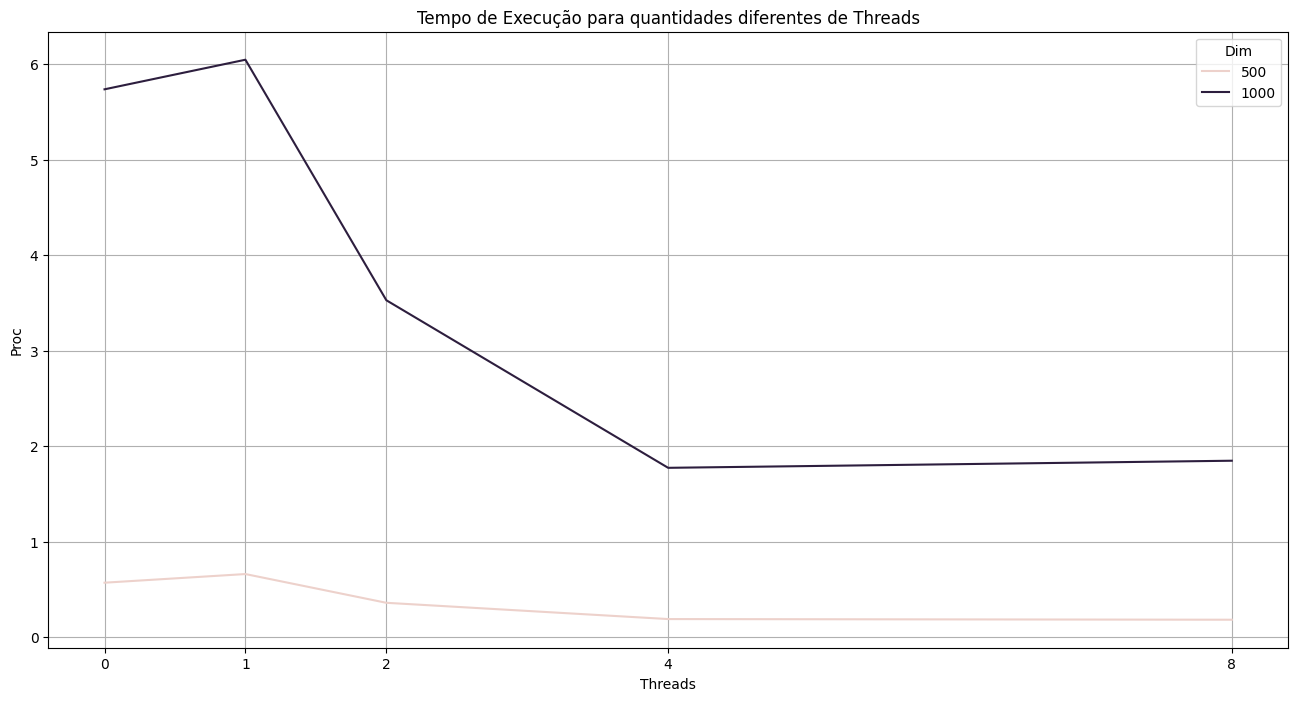

In [23]:
plotar_tempo(2000, df, True)

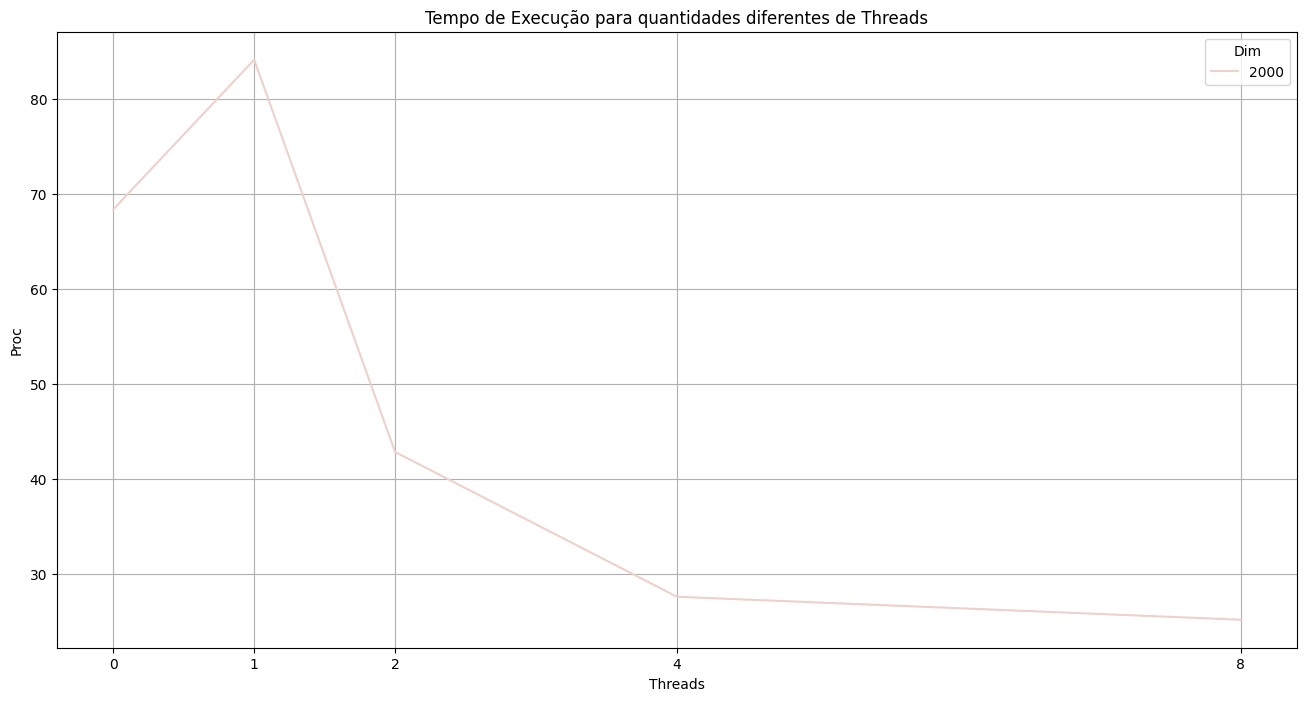

In [24]:
plotar_tempo(2000, df, False) # Apenas dim 2000

In [91]:
def calc_aceleracao(row):
    dim = row.name[1]

    return df_medias.loc[0, dim]["Proc"] / row["Proc"]

In [92]:
df_medias["Acel"] = df_medias.apply(calc_aceleracao, axis=1)

In [93]:
df_medias

Init       Proc       End      Acel
Threads Dim                                          
0       500   0.000947   0.571644  0.000188  1.000000
        1000  0.003701   5.738155  0.000755  1.000000
        2000  0.014183  68.367970  0.003169  1.000000
1       500   0.000986   0.662154  0.000238  0.863310
        1000  0.003710   6.048011  0.000797  0.948767
        2000  0.013966  84.120470  0.002999  0.812739
2       500   0.000974   0.361192  0.000179  1.582660
        1000  0.003562   3.529437  0.000801  1.625799
        2000  0.014571  42.833296  0.003149  1.596141
4       500   0.000976   0.190793  0.000231  2.996148
        1000  0.003770   1.774549  0.000793  3.233585
        2000  0.014047  27.598436  0.002990  2.477241
8       500   0.001026   0.183928  0.000221  3.107977
        1000  0.003593   1.848884  0.000764  3.103578
        2000  0.016458  25.178197  0.003279  2.715364

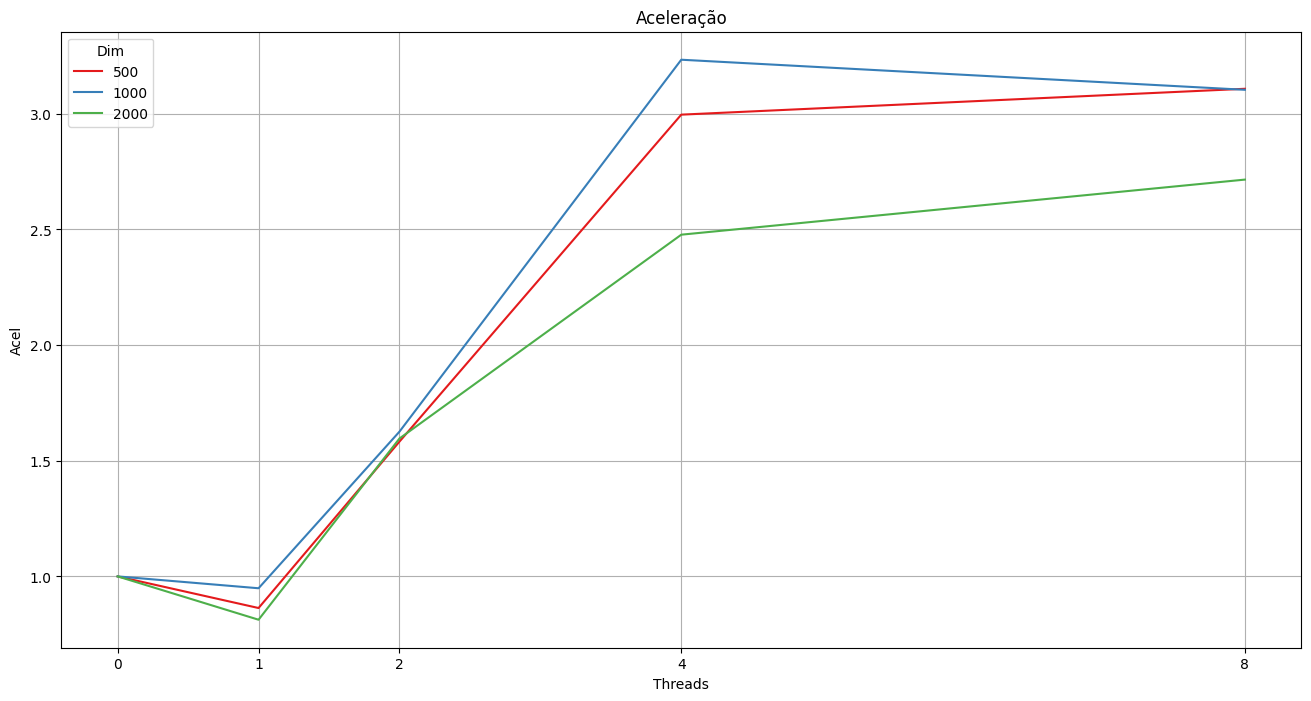

In [122]:
# Criar o gráfico de linhas
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.xticks(ticks=df['Threads'].unique())
plt.title('Aceleração')
sns.lineplot(data=df_medias, x='Threads', y='Acel', hue='Dim', palette='Set1')

# Exibir o gráfico
plt.show()

In [116]:
def calc_efic(row):
    th = row.name[0]

    if th == 0:
        return 1
    return row["Acel"] / th

In [117]:
df_medias["Efic"] = df_medias.apply(calc_efic, axis=1)

In [118]:
df_medias

Init       Proc       End      Acel      Efic
Threads Dim                                                    
0       500   0.000947   0.571644  0.000188  1.000000  1.000000
        1000  0.003701   5.738155  0.000755  1.000000  1.000000
        2000  0.014183  68.367970  0.003169  1.000000  1.000000
1       500   0.000986   0.662154  0.000238  0.863310  0.863310
        1000  0.003710   6.048011  0.000797  0.948767  0.948767
        2000  0.013966  84.120470  0.002999  0.812739  0.812739
2       500   0.000974   0.361192  0.000179  1.582660  0.791330
        1000  0.003562   3.529437  0.000801  1.625799  0.812899
        2000  0.014571  42.833296  0.003149  1.596141  0.798070
4       500   0.000976   0.190793  0.000231  2.996148  0.749037
        1000  0.003770   1.774549  0.000793  3.233585  0.808396
        2000  0.014047  27.598436  0.002990  2.477241  0.619310
8       500   0.001026   0.183928  0.000221  3.107977  0.388497
        1000  0.003593   1.848884  0.000764  3.103578  0.387947
        2000  0.016458  25.178197  0.003279  2.715364  0.339421

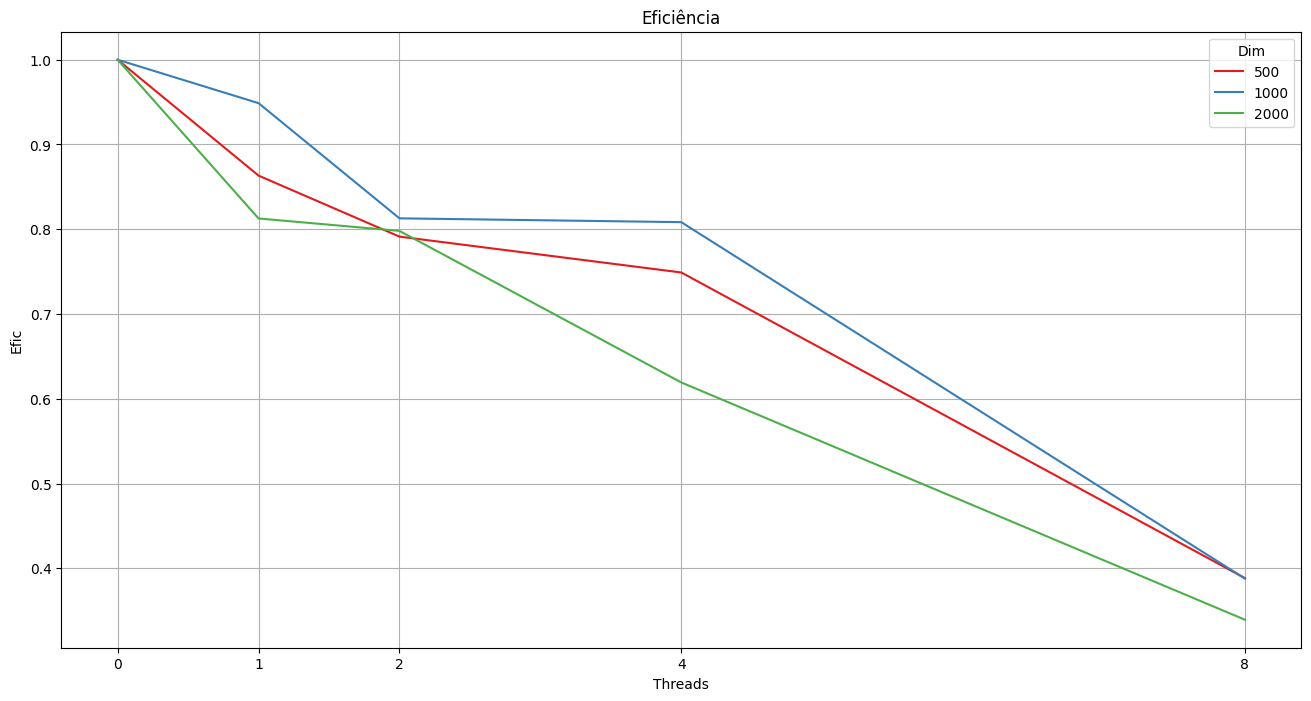

In [121]:
# Criar o gráfico de linhas
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.xticks(ticks=df['Threads'].unique())
plt.title('Eficiência')
sns.lineplot(data=df_medias, x='Threads', y='Efic', hue='Dim', palette='Set1')

# Exibir o gráfico
plt.show()